In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            60000 non-null  int64 
 1   Title         60000 non-null  object
 2   Body          60000 non-null  object
 3   Tags          60000 non-null  object
 4   CreationDate  60000 non-null  object
 5   Y             60000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.7+ MB


In [4]:
df.describe()

,Id
count,6.000000e+04
mean,4.575738e+07
std,7.124727e+06
min,3.455266e+07
25%,3.975281e+07
50%,4.503276e+07
75%,5.127130e+07
max,6.047032e+07


In [5]:
df = df.drop(['Id', 'Tags', 'CreationDate'], axis=1)
df['Y'] = df['Y'].map({'LQ_CLOSE':0, 'LQ_EDIT': 1, 'HQ':2})
df.head()

,Title,Body,Y
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,0
1,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,1
2,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,2
3,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,2
4,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",2


In [6]:
df['Body_length'] = df['Body'].apply(len)
df['Title_length'] = df['Title'].apply(len)

In [7]:
df.head(2)

,Title,Body,Y,Body_length,Title_length
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,0,313,38
1,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,1,598,93


# Data Visualization

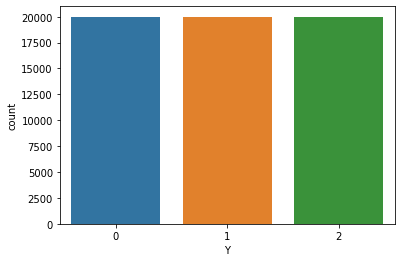

In [8]:
sns.countplot(df['Y'])

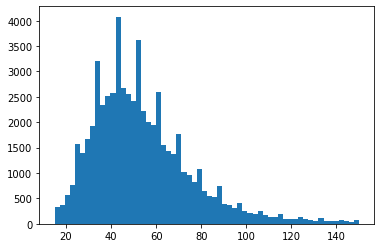

In [9]:
plt.hist(df['Title_length'],bins=60)
plt.show()

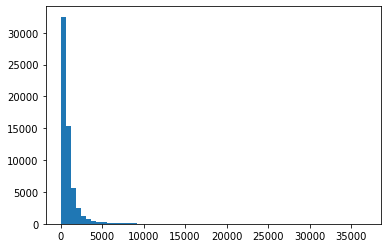

In [10]:
plt.hist(df['Body_length'],bins=60)
plt.show()

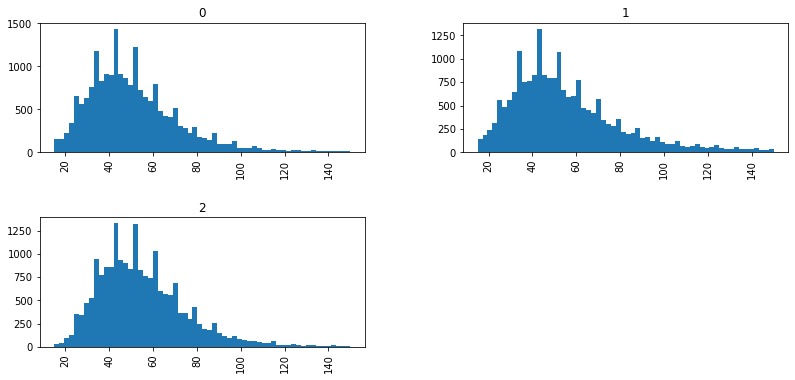

In [11]:
df.hist(column='Title_length',by='Y',bins=60,figsize=(13,6))
plt.show()

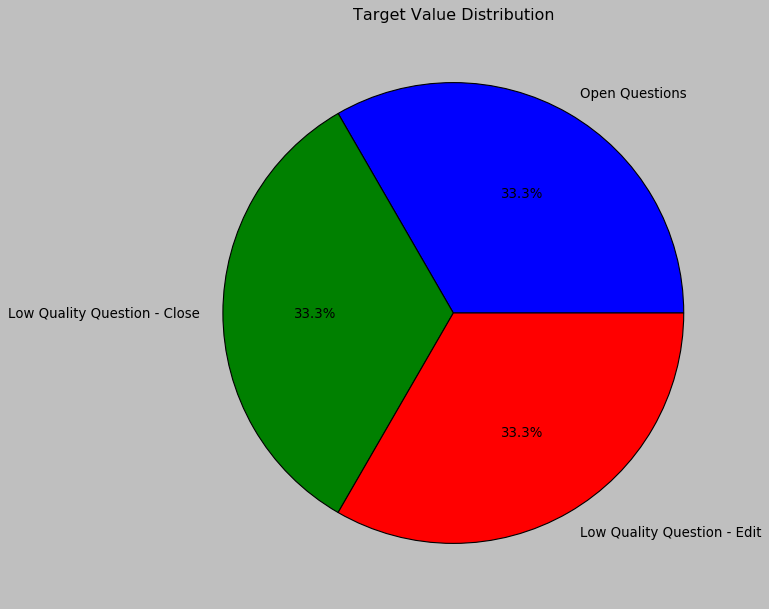

In [12]:
labels = ['Open Questions', 'Low Quality Question - Close', 'Low Quality Question - Edit']
values = [len(df[df['Y'] == 2]), len(df[df['Y'] == 0]), len(df[df['Y'] == 1])]
plt.style.use('classic')
plt.figure(figsize=(16, 9))
plt.pie(x=values, labels=labels, autopct="%1.1f%%")
plt.title("Target Value Distribution")
plt.show()

In [13]:
df['text'] = df['Title'] + ' ' + df['Body']
df = df.drop(['Title', 'Body'], axis=1)
df.head()

,Y,Body_length,Title_length,text
0,0,313,38,Java: Repeat Task Every Random Seconds <p>I'm ...
1,1,598,93,How to get all the child records from differen...
2,2,113,33,Why are Java Optionals immutable? <p>I'd like ...
3,2,4814,53,Text Overlay Image with Darkened Opacity React...
4,2,674,42,Why ternary operator in swift is so picky? <p>...


# Text  Processing

In [21]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

# Lemmatizer = WordNetLemmatizer()
stemming = PorterStemmer()


def text_processing(mess):
    """
    1. it will remove punctuation
    2. Remvie all stops words
    3. return clean data 
    """
    nonpunc = [char for char in mess if char not in string.punctuation]
    
    nonpunc = ''.join(nonpunc)
    
    return [stemming.stem(word) for word in nonpunc.split() if word.lower() not in stopwords.words('english')]



# Train-Test-Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],df['Y'], test_size=0.33, random_state=42)

# Prediction 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('BOW',CountVectorizer(analyzer=text_processing)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])


In [23]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('BOW',
                 CountVectorizer(analyzer=<function text_processing at 0x000001BADB415678>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [24]:
predict = pipeline.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


print(classification_report(y_test,predict))
print()
print(confusion_matrix(y_test,predict))
print()
print('Accuarcy ->',accuracy_score(y_test,predict))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      6704
           1       0.94      0.76      0.84      6511
           2       0.73      0.88      0.80      6585

    accuracy                           0.80     19800
   macro avg       0.81      0.80      0.80     19800
weighted avg       0.81      0.80      0.80     19800


[[5054  247 1403]
 [ 807 4972  732]
 [ 759   43 5783]]

Accuarcy -> 0.7984343434343434


# Using Naive Bayes ->MultinomialNB we get 78% Accuracy..